In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

In [2]:
# Source of file: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data
COVID19 = pd.read_excel('C://Users//Angus//Documents//AngusDataScience//datasets//COVID-19-geographic-distribution-worldwide-2020-04-14.xlsx')

In [3]:
COVID = COVID19.loc[:,['dateRep','countriesAndTerritories','cases','deaths','popData2018']]
COVID.rename(columns={'dateRep':'Date','countriesAndTerritories':'country','popData2018':'pop_2018'}, inplace=True)
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 5 columns):
Date        10742 non-null datetime64[ns]
country     10742 non-null object
cases       10742 non-null int64
deaths      10742 non-null int64
pop_2018    10675 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 419.7+ KB


In [4]:
COVID.head()

,Date,country,cases,deaths,pop_2018
0,2020-04-14,Afghanistan,58,3,37172386.0
1,2020-04-13,Afghanistan,52,0,37172386.0
2,2020-04-12,Afghanistan,34,3,37172386.0
3,2020-04-11,Afghanistan,37,0,37172386.0
4,2020-04-10,Afghanistan,61,1,37172386.0


In [5]:
cases_top20 = COVID.groupby('country')['cases'].sum().sort_values(ascending=False).head(20)
cases_top20.head()

country
United_States_of_America    582594
Spain                       169496
Italy                       159516
Germany                     125098
France                       98076
Name: cases, dtype: int64

In [6]:
deaths_top20 = COVID.groupby('country')['deaths'].sum().sort_values(ascending=False).head(20)
deaths_top20.head()

country
United_States_of_America    23649
Italy                       20465
Spain                       17489
France                      14967
United_Kingdom              11329
Name: deaths, dtype: int64

In [7]:
# COVID_cases_daycount

COVID_pivot_c = COVID.pivot(index='Date',columns='country',values='cases')
COVID_pivot_c.columns.name = 'country_c'

# cumsum of cases
COVID_pivot_cases_cumsum = COVID_pivot_c.cumsum(axis=0)
COVID_pivot_cases_cumsum

# cumsum of cases from 10+ (values)
COVID_pivot_cases_cumsum_10_plus = COVID_pivot_cases_cumsum.copy()
COVID_pivot_cases_cumsum_10_plus[COVID_pivot_cases_cumsum_10_plus<10]=np.nan
COVID_pivot_cases_cumsum_10_plus.fillna(method='ffill', inplace=True)
COVID_pivot_cases_cumsum_10_plus

# cumsum of cases from 10+ (day index)
COVID_pivot_cases_cumsum_1s = COVID_pivot_cases_cumsum_10_plus.copy()
COVID_pivot_cases_cumsum_1s[COVID_pivot_cases_cumsum_1s>=10]=1
COVID_pivot_cases_cumsum_1s
COVID_pivot_cases_dayindex = COVID_pivot_cases_cumsum_1s.cumsum(axis=0)
#COVID_pivot_cases_dayindex

In [8]:
COVID_cases_cumsum_u = COVID_pivot_cases_cumsum_10_plus.unstack()
COVID_cases_dayindex_u = COVID_pivot_cases_dayindex.unstack()

In [9]:
COVID_cases_dayindex_cumsum_u = pd.concat([COVID_cases_dayindex_u, COVID_cases_cumsum_u], axis=1)
COVID_cases_dayindex_cumsum_u.rename(columns={0: 'dayindex_c', 1:'cases_cumsum'}, inplace=True)

In [10]:
COVID_cases_dayindex_cumsum_u.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21836 entries, (Afghanistan, 2019-12-31 00:00:00) to (Zimbabwe, 2020-04-14 00:00:00)
Data columns (total 2 columns):
dayindex_c      5810 non-null float64
cases_cumsum    5810 non-null float64
dtypes: float64(2)
memory usage: 407.7+ KB


In [11]:
COVID_cases_dayindex_cumsum_r = COVID_cases_dayindex_cumsum_u.reset_index()
COVID_cases_dayindex_cumsum_r.set_index('Date', inplace=True)
COVID_cases_dayindex_cumsum_r.head()

,country_c,dayindex_c,cases_cumsum
Date,,,
2019-12-31,Afghanistan,NaN,NaN
2020-01-01,Afghanistan,NaN,NaN
2020-01-02,Afghanistan,NaN,NaN
2020-01-03,Afghanistan,NaN,NaN
2020-01-04,Afghanistan,NaN,NaN


In [12]:
# REMOVE ALL NANs  dropna()
COVID_cases_dayindex_cumsum_r_dropna = COVID_cases_dayindex_cumsum_r.dropna(axis=0, how='any')
COVID_cases_dayindex_cumsum_r_dropna.head()

,country_c,dayindex_c,cases_cumsum
Date,,,
2020-03-15,Afghanistan,1.0,10.0
2020-03-16,Afghanistan,2.0,16.0
2020-03-17,Afghanistan,3.0,21.0
2020-03-18,Afghanistan,4.0,22.0
2020-03-19,Afghanistan,5.0,22.0


In [13]:
COVID_CASES = COVID_cases_dayindex_cumsum_r_dropna.pivot(index='dayindex_c', columns='country_c', values='cases_cumsum')
COVID_CASES.head()

country_c,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,...,United_Kingdom,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
dayindex_c,,,,,,,,,,,,,,,,,,,,,
1.0,10.0,10.0,12.0,14.0,10.0,15.0,12.0,13.0,12.0,11.0,...,13.0,12.0,17.0,11.0,29.0,16.0,10.0,10.0,12.0,10.0
2.0,16.0,11.0,17.0,14.0,14.0,15.0,12.0,20.0,17.0,11.0,...,13.0,12.0,17.0,11.0,50.0,23.0,15.0,10.0,14.0,11.0
3.0,21.0,23.0,17.0,53.0,16.0,15.0,19.0,30.0,19.0,11.0,...,13.0,12.0,17.0,11.0,79.0,23.0,33.0,12.0,16.0,11.0
4.0,22.0,33.0,17.0,75.0,17.0,15.0,19.0,52.0,28.0,12.0,...,13.0,12.0,17.0,12.0,94.0,33.0,33.0,13.0,28.0,11.0
5.0,22.0,38.0,20.0,75.0,19.0,15.0,31.0,78.0,28.0,13.0,...,16.0,13.0,19.0,12.0,110.0,33.0,33.0,14.0,29.0,14.0


In [14]:
# COVID_deaths_daycount

COVID_pivot_d = COVID.pivot(index='Date',columns='country',values='deaths')
COVID_pivot_d.columns.name = 'country_d'

# cumsum of deaths
COVID_pivot_deaths_cumsum = COVID_pivot_d.cumsum(axis=0)
COVID_pivot_deaths_cumsum

# cumsum of deaths from 10+ (values)
COVID_pivot_deaths_cumsum_10_plus = COVID_pivot_deaths_cumsum.copy()
COVID_pivot_deaths_cumsum_10_plus[COVID_pivot_deaths_cumsum_10_plus<10]=np.nan
COVID_pivot_deaths_cumsum_10_plus.fillna(method='ffill', inplace=True)
COVID_pivot_deaths_cumsum_10_plus

# cumsum of deaths from 10+ (day index)
COVID_pivot_deaths_cumsum_1s = COVID_pivot_deaths_cumsum_10_plus.copy()
COVID_pivot_deaths_cumsum_1s[COVID_pivot_deaths_cumsum_1s>=10]=1
COVID_pivot_deaths_cumsum_1s
COVID_pivot_deaths_dayindex = COVID_pivot_deaths_cumsum_1s.cumsum(axis=0)
#COVID_pivot_deaths_dayindex

In [15]:
COVID_deaths_cumsum_u = COVID_pivot_deaths_cumsum_10_plus.unstack()
COVID_deaths_dayindex_u = COVID_pivot_deaths_dayindex.unstack()

In [16]:
COVID_deaths_dayindex_cumsum_u = pd.concat([COVID_deaths_dayindex_u, COVID_deaths_cumsum_u], axis=1)
COVID_deaths_dayindex_cumsum_u.rename(columns={0: 'dayindex_d', 1:'deaths_cumsum'}, inplace=True)

In [17]:
COVID_deaths_dayindex_cumsum_u.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21836 entries, (Afghanistan, 2019-12-31 00:00:00) to (Zimbabwe, 2020-04-14 00:00:00)
Data columns (total 2 columns):
dayindex_d       1699 non-null float64
deaths_cumsum    1699 non-null float64
dtypes: float64(2)
memory usage: 407.7+ KB


In [18]:
COVID_deaths_dayindex_cumsum_r = COVID_deaths_dayindex_cumsum_u.reset_index()
COVID_deaths_dayindex_cumsum_r.set_index('Date', inplace=True)
COVID_deaths_dayindex_cumsum_r.head()

,country_d,dayindex_d,deaths_cumsum
Date,,,
2019-12-31,Afghanistan,NaN,NaN
2020-01-01,Afghanistan,NaN,NaN
2020-01-02,Afghanistan,NaN,NaN
2020-01-03,Afghanistan,NaN,NaN
2020-01-04,Afghanistan,NaN,NaN


In [19]:
# REMOVE ALL NANs  dropna()
COVID_deaths_dayindex_cumsum_r_dropna = COVID_deaths_dayindex_cumsum_r.dropna(axis=0, how='any')
COVID_deaths_dayindex_cumsum_r_dropna.head()

,country_d,dayindex_d,deaths_cumsum
Date,,,
2020-04-08,Afghanistan,1.0,11.0
2020-04-09,Afghanistan,2.0,14.0
2020-04-10,Afghanistan,3.0,15.0
2020-04-11,Afghanistan,4.0,15.0
2020-04-12,Afghanistan,5.0,18.0


In [20]:
COVID_DEATHS = COVID_deaths_dayindex_cumsum_r_dropna.pivot(index='dayindex_d', columns='country_d', values='deaths_cumsum')
COVID_DEATHS.head()

country_d,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
dayindex_d,,,,,,,,,,,,,,,,,,,,,
1.0,11.0,10.0,10.0,12.0,12.0,10.0,11.0,16.0,10.0,12.0,...,28.0,10.0,11.0,10.0,10.0,21.0,11.0,10.0,10.0,11.0
2.0,14.0,10.0,10.0,14.0,17.0,11.0,13.0,25.0,11.0,17.0,...,35.0,10.0,13.0,10.0,13.0,30.0,13.0,10.0,10.0,12.0
3.0,15.0,12.0,15.0,15.0,19.0,13.0,13.0,30.0,11.0,20.0,...,47.0,16.0,14.0,12.0,13.0,37.0,20.0,11.0,21.0,14.0
4.0,15.0,15.0,17.0,16.0,20.0,13.0,14.0,34.0,12.0,21.0,...,84.0,20.0,19.0,15.0,18.0,44.0,20.0,12.0,35.0,17.0
5.0,18.0,15.0,17.0,17.0,24.0,14.0,16.0,52.0,NaN,27.0,...,121.0,21.0,21.0,19.0,19.0,59.0,23.0,12.0,55.0,21.0


In [22]:
# COVID CASES TOP 20
#cases_top20.index
COVID_CASES_20 = COVID_CASES[cases_top20.index]
COVID_CASES_20.head()

country_c,United_States_of_America,Spain,Italy,Germany,France,United_Kingdom,China,Iran,Turkey,Belgium,Netherlands,Canada,Switzerland,Brazil,Russia,Portugal,Austria,Israel,Sweden,Ireland
dayindex_c,,,,,,,,,,,,,,,,,,,,
1.0,11.0,12.0,17.0,11.0,11.0,13.0,27.0,18.0,18.0,13.0,13.0,11.0,12.0,13.0,10.0,13.0,10.0,10.0,12.0,13.0
2.0,11.0,25.0,79.0,11.0,11.0,13.0,27.0,28.0,47.0,23.0,18.0,11.0,18.0,13.0,10.0,21.0,14.0,10.0,13.0,18.0
3.0,11.0,34.0,132.0,11.0,11.0,13.0,27.0,43.0,98.0,50.0,28.0,12.0,24.0,25.0,10.0,30.0,18.0,10.0,14.0,19.0
4.0,12.0,66.0,229.0,12.0,11.0,13.0,44.0,61.0,191.0,109.0,38.0,14.0,30.0,25.0,10.0,39.0,24.0,15.0,15.0,21.0
5.0,12.0,83.0,322.0,13.0,11.0,16.0,44.0,95.0,359.0,169.0,82.0,16.0,37.0,34.0,10.0,41.0,29.0,17.0,24.0,21.0


In [23]:
# COVID DEATHS TOP 20
#deaths_top20.index
COVID_DEATHS_20 = COVID_DEATHS[deaths_top20.index]
COVID_DEATHS_20.head()

country_d,United_States_of_America,Italy,Spain,France,United_Kingdom,Iran,Belgium,China,Germany,Netherlands,Brazil,Turkey,Sweden,Switzerland,Canada,Portugal,Indonesia,Austria,Ireland,Ecuador
dayindex_d,,,,,,,,,,,,,,,,,,,,
1.0,11.0,11.0,28.0,10.0,10.0,12.0,14.0,17.0,12.0,12.0,11.0,21.0,10.0,11.0,10.0,12.0,19.0,16.0,19.0,14.0
2.0,12.0,12.0,35.0,19.0,10.0,15.0,21.0,17.0,13.0,20.0,18.0,30.0,10.0,13.0,12.0,14.0,25.0,25.0,22.0,18.0
3.0,14.0,17.0,47.0,30.0,21.0,19.0,37.0,26.0,13.0,24.0,25.0,37.0,16.0,14.0,18.0,23.0,38.0,30.0,36.0,27.0
4.0,17.0,21.0,84.0,33.0,35.0,26.0,67.0,41.0,13.0,43.0,34.0,44.0,20.0,19.0,20.0,33.0,48.0,34.0,46.0,29.0
5.0,21.0,29.0,121.0,48.0,55.0,34.0,75.0,56.0,43.0,58.0,46.0,59.0,21.0,21.0,24.0,43.0,49.0,52.0,54.0,34.0


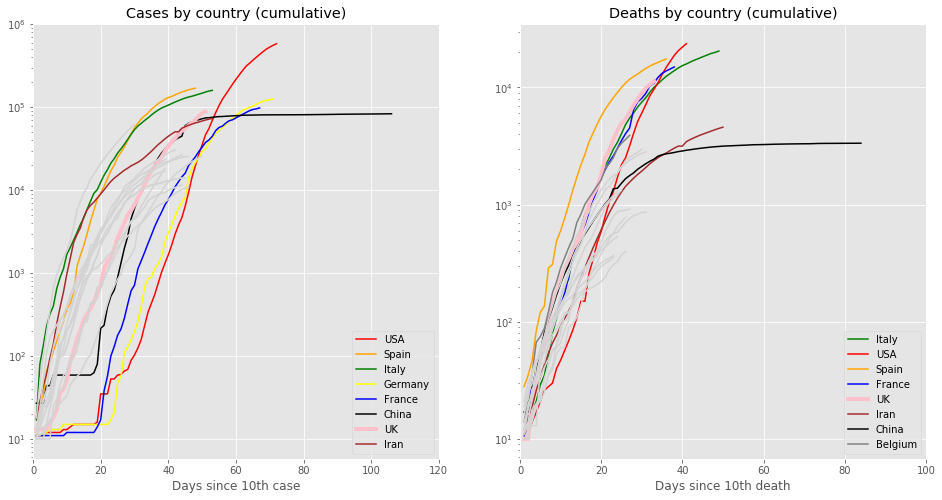

In [26]:
# PLOT CASES & DEATHS

fig_c_d = plt.figure(figsize=(16,8))

ax_c = fig_c_d.add_subplot(121)
ax_d = fig_c_d.add_subplot(122)

plt.style.use('ggplot')

ax_c.plot(COVID_CASES_20['United_States_of_America'], label='USA', color='red')
ax_c.plot(COVID_CASES_20['Spain'], label='Spain', color='orange')
ax_c.plot(COVID_CASES_20['Italy'], label='Italy', color='green')
ax_c.plot(COVID_CASES_20['Germany'], label='Germany', color='yellow')
ax_c.plot(COVID_CASES_20['France'], label='France', color='blue')
ax_c.plot(COVID_CASES_20['China'], label='China', color='black')
ax_c.plot(COVID_CASES_20['United_Kingdom'], label='UK', color='pink',linewidth=4)
ax_c.plot(COVID_CASES_20['Iran'], label='Iran', color='brown')

ax_d.plot(COVID_DEATHS_20['Italy'], label='Italy', color='green')
ax_d.plot(COVID_DEATHS_20['United_States_of_America'], label='USA', color='red')
ax_d.plot(COVID_DEATHS_20['Spain'], label='Spain', color='orange')
ax_d.plot(COVID_DEATHS_20['France'], label='France', color='blue')
ax_d.plot(COVID_DEATHS_20['United_Kingdom'], label='UK', color='pink',linewidth=4)
ax_d.plot(COVID_DEATHS_20['Iran'], label='Iran', color='brown')
ax_d.plot(COVID_DEATHS_20['China'], label='China',color='black')
ax_d.plot(COVID_DEATHS_20['Belgium'], label='Belgium',color='gray')

ax_c.set(title='Cases by country (cumulative)', xlabel='Days since 10th case')
ax_d.set(title='Deaths by country (cumulative)', xlabel='Days since 10th death')

ax_c.legend(loc='lower right')
ax_d.legend(loc='lower right')

ax_c.plot(COVID_CASES_20['Turkey'], color='lightgray')
ax_c.plot(COVID_CASES_20['Belgium'], color='lightgray')
ax_c.plot(COVID_CASES_20['Switzerland'], color='lightgray')
ax_c.plot(COVID_CASES_20['Netherlands'], color='lightgray')
ax_c.plot(COVID_CASES_20['Canada'], color='lightgray')
ax_c.plot(COVID_CASES_20['Brazil'], color='lightgray')
ax_c.plot(COVID_CASES_20['Portugal'], color='lightgray')
ax_c.plot(COVID_CASES_20['Austria'], color='lightgray')
ax_c.plot(COVID_CASES_20['Russia'], color='lightgray')
ax_c.plot(COVID_CASES_20['Austria'], color='lightgray')
ax_c.plot(COVID_CASES_20['Israel'], color='lightgray')
ax_c.plot(COVID_CASES_20['Sweden'], color='lightgray')

ax_d.plot(COVID_DEATHS_20['Germany'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Netherlands'],color='lightgray')
ax_d.plot(COVID_DEATHS_20['Brazil'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Turkey'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Sweden'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Switzerland'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Canada'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Portugal'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Austria'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Indonesia'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Ecuador'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Ireland'], color='lightgray')

ax_c.set(xlim=(0,120))
ax_d.set(xlim=(0,100))

ax_c.set_yscale('log')
ax_d.set_yscale('log')

plt.show()

In [27]:
#COVID_CASES_20.columns[:10] & COVID_DEATHS_20.columns[:10]

In [28]:
# ADJUSTING CASES TO A MORE REALISTIC LEVEL  
# (Involves shifting all cases (dayindex and cumsum) forward by 10 days) so they can be mapped to associated deaths

In [29]:
COVID_cases_dayindex_cumsum_r.head()

,country_c,dayindex_c,cases_cumsum
Date,,,
2019-12-31,Afghanistan,NaN,NaN
2020-01-01,Afghanistan,NaN,NaN
2020-01-02,Afghanistan,NaN,NaN
2020-01-03,Afghanistan,NaN,NaN
2020-01-04,Afghanistan,NaN,NaN


In [30]:
COVID_cases_dayindex_cumsum_r.reset_index()
cases_dateindex_reported = COVID_cases_dayindex_cumsum_r.pivot_table(index='Date',columns='country_c',values=['dayindex_c','cases_cumsum'])
cases_dateindex_reported.index

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14'],
              dtype='datetime64[ns]', name='Date', length=106, freq=None)

In [31]:
cases_dateindex_plus10days_idx = cases_dateindex_reported.index + timedelta(10)
cases_dateindex_plus10days_idx

DatetimeIndex(['2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-18', '2020-01-19',
               ...
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24'],
              dtype='datetime64[ns]', name='Date', length=106, freq='D')

In [32]:
cases_dateindex_plus10 = cases_dateindex_reported.copy()
cases_dateindex_plus10.index = cases_dateindex_plus10days_idx
cases_dateindex_plus10.head()

cases_cumsum                                                     \
country_c   Afghanistan Albania Algeria Andorra Angola Antigua_and_Barbuda   
Date                                                                         
2020-01-10          NaN     NaN     NaN     NaN    NaN                 NaN   
2020-01-11          NaN     NaN     NaN     NaN    NaN                 NaN   
2020-01-12          NaN     NaN     NaN     NaN    NaN                 NaN   
2020-01-13          NaN     NaN     NaN     NaN    NaN                 NaN   
2020-01-14          NaN     NaN     NaN     NaN    NaN                 NaN   

                                              ...     dayindex_c  \
country_c  Argentina Armenia Aruba Australia  ... United_Kingdom   
Date                                          ...                  
2020-01-10       NaN     NaN   NaN       NaN  ...            NaN   
2020-01-11       NaN     NaN   NaN       NaN  ...            NaN   
2020-01-12       NaN     NaN   NaN       NaN  ...            NaN   
2020-01-13       NaN     NaN   NaN       NaN  ...            NaN   
2020-01-14       NaN     NaN   NaN       NaN  ...            NaN   

                                                                     \
country_c  United_Republic_of_Tanzania United_States_Virgin_Islands   
Date                                                                  
2020-01-10                         NaN                          NaN   
2020-01-11                         NaN                          NaN   
2020-01-12                         NaN                          NaN   
2020-01-13                         NaN                          NaN   
2020-01-14                         NaN                          NaN   

                                                                          \
country_c  United_States_of_America Uruguay Uzbekistan Venezuela Vietnam   
Date                                                                       
2020-01-10                      NaN     NaN        NaN       NaN     NaN   
2020-01-11                      NaN     NaN        NaN       NaN     NaN   
2020-01-12                      NaN     NaN        NaN       NaN     NaN   
2020-01-13                      NaN     NaN        NaN       NaN     NaN   
2020-01-14                      NaN     NaN        NaN       NaN     NaN   

                            
country_c  Zambia Zimbabwe  
Date                        
2020-01-10    NaN      NaN  
2020-01-11    NaN      NaN  
2020-01-12    NaN      NaN  
2020-01-13    NaN      NaN  
2020-01-14    NaN      NaN  

[5 rows x 384 columns]

In [33]:
cases_plus10days_dayindex = cases_dateindex_plus10['dayindex_c'].unstack()
cases_plus10days_cases_cumsum = cases_dateindex_plus10['cases_cumsum'].unstack()

In [34]:
cases_plus10days_dayindex.head()

country_c    Date      
Afghanistan  2020-01-10   NaN
             2020-01-11   NaN
             2020-01-12   NaN
             2020-01-13   NaN
             2020-01-14   NaN
dtype: float64

In [35]:
cases_plus10days_cases_cumsum.head()

country_c    Date      
Afghanistan  2020-01-10   NaN
             2020-01-11   NaN
             2020-01-12   NaN
             2020-01-13   NaN
             2020-01-14   NaN
dtype: float64

In [36]:
COVID_cases_dayindex_cumsum_plus10days = pd.concat([cases_plus10days_dayindex, cases_plus10days_cases_cumsum], axis=1)
#COVID_cases_dayindex_cumsum_plus10days
COVID_cases_dayindex_cumsum_plus10days.rename(columns={0: 'dayindex_c_10', 1:'cases_cumsum_10'}, inplace=True)
COVID_cases_dayindex_cumsum_plus10days_r = COVID_cases_dayindex_cumsum_plus10days.reset_index()
COVID_cases_dayindex_cumsum_plus10days_r.set_index('Date', inplace=True)
COVID_cases_dayindex_cumsum_plus10days_r.head()

,country_c,dayindex_c_10,cases_cumsum_10
Date,,,
2020-01-10,Afghanistan,NaN,NaN
2020-01-11,Afghanistan,NaN,NaN
2020-01-12,Afghanistan,NaN,NaN
2020-01-13,Afghanistan,NaN,NaN
2020-01-14,Afghanistan,NaN,NaN


In [37]:
COVID_deaths_dayindex_cumsum_r.head()

,country_d,dayindex_d,deaths_cumsum
Date,,,
2019-12-31,Afghanistan,NaN,NaN
2020-01-01,Afghanistan,NaN,NaN
2020-01-02,Afghanistan,NaN,NaN
2020-01-03,Afghanistan,NaN,NaN
2020-01-04,Afghanistan,NaN,NaN


In [38]:
COVID_c_d_dayindex_cumsum_adj = pd.merge(COVID_cases_dayindex_cumsum_plus10days_r, COVID_deaths_dayindex_cumsum_r, left_on=['Date','country_c'], right_on=['Date','country_d'], how='outer')
COVID_c_d_dayindex_cumsum_adj_dropna = COVID_c_d_dayindex_cumsum_adj.dropna(axis=0)
COVID_c_d_dayindex_cumsum_adj_dropna.head()

,country_c,dayindex_c_10,cases_cumsum_10,country_d,dayindex_d,deaths_cumsum
Date,,,,,,
2020-04-08,Afghanistan,15.0,106.0,Afghanistan,1.0,11.0
2020-04-09,Afghanistan,16.0,114.0,Afghanistan,2.0,14.0
2020-04-10,Afghanistan,17.0,141.0,Afghanistan,3.0,15.0
2020-04-11,Afghanistan,18.0,166.0,Afghanistan,4.0,15.0
2020-04-12,Afghanistan,19.0,192.0,Afghanistan,5.0,18.0


In [39]:
COVID_c_d_dayindex_cumsum_adj_dropna['deathrate'] = COVID_c_d_dayindex_cumsum_adj_dropna.loc[:,'deaths_cumsum']/COVID_c_d_dayindex_cumsum_adj_dropna.loc[:,'cases_cumsum_10']
COVID_c_d_dayindex_cumsum_adj_dropna.head()

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country_c,dayindex_c_10,cases_cumsum_10,country_d,dayindex_d,deaths_cumsum,deathrate
Date,,,,,,,
2020-04-08,Afghanistan,15.0,106.0,Afghanistan,1.0,11.0,0.103774
2020-04-09,Afghanistan,16.0,114.0,Afghanistan,2.0,14.0,0.122807
2020-04-10,Afghanistan,17.0,141.0,Afghanistan,3.0,15.0,0.106383
2020-04-11,Afghanistan,18.0,166.0,Afghanistan,4.0,15.0,0.090361
2020-04-12,Afghanistan,19.0,192.0,Afghanistan,5.0,18.0,0.093750


In [40]:
country_deathrates = COVID_c_d_dayindex_cumsum_adj_dropna.groupby('country_c')['deathrate','deaths_cumsum'].mean().sort_values(by='deathrate', ascending=False)
country_deathrates_maingroup = country_deathrates[country_deathrates['deaths_cumsum']>100]
country_deathrates_maingroup

,deathrate,deaths_cumsum
country_c,,
Spain,0.478198,6372.611111
Iran,0.461165,1951.604651
Indonesia,0.456442,166.560000
Turkey,0.446191,533.750000
Italy,0.434568,7856.953488
Algeria,0.432376,106.960000
United_Kingdom,0.372430,2873.212121
Philippines,0.330975,112.777778
Ecuador,0.296406,146.608696


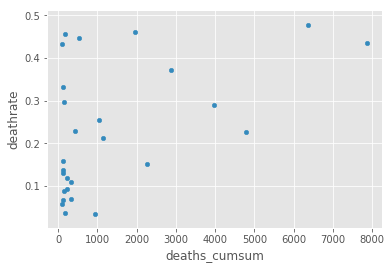

In [41]:
country_deathrates_maingroup.plot(kind='scatter',x='deaths_cumsum',y='deathrate')
plt.show()

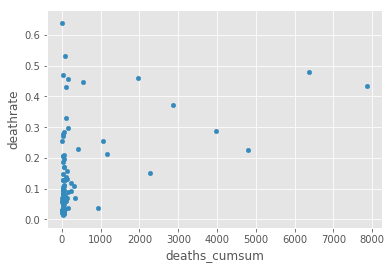

In [42]:
country_deathrates.plot(kind='scatter',x='deaths_cumsum',y='deathrate')
plt.show()

In [43]:
# ASSUMING AN ACTUAL DEATH RATE OF 1.00%
# THEREFORE,... CASES CUMSUM OF 10 DAYS AGO = (TODAY'S DEATHS CUMSUM / 1.00) * 100

In [44]:
Mortality_assumption = 1.00
COVID_deaths_dayindex_cumsum_r_dropna = COVID_deaths_dayindex_cumsum_r.dropna(axis=0)
COVID_deaths_dayindex_cumsum_r_dropna['cases_cumsum_est_'] = (COVID_deaths_dayindex_cumsum_r_dropna.loc[:,'deaths_cumsum'] / Mortality_assumption) * 100
COVID_cases_cumsum_est_ = COVID_deaths_dayindex_cumsum_r_dropna.loc[:,['country_d', 'cases_cumsum_est_']]
COVID_cases_cumsum_est_.head()

C:\Users\Angus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country_d,cases_cumsum_est_
Date,,
2020-04-08,Afghanistan,1100.0
2020-04-09,Afghanistan,1400.0
2020-04-10,Afghanistan,1500.0
2020-04-11,Afghanistan,1500.0
2020-04-12,Afghanistan,1800.0


In [45]:
# TIMESHIFT BACK 10 DAYS

In [46]:
COVID_cases_cumsum_est_.index

DatetimeIndex(['2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-03-29',
               '2020-03-30', '2020-03-31',
               ...
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14'],
              dtype='datetime64[ns]', name='Date', length=1699, freq=None)

In [47]:
COVID_cases_cumsum_est_index = COVID_cases_cumsum_est_.index - timedelta(10)
COVID_cases_cumsum_est_index

DatetimeIndex(['2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-03-19',
               '2020-03-20', '2020-03-21',
               ...
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04'],
              dtype='datetime64[ns]', name='Date', length=1699, freq=None)

In [48]:
COVID_cases_cumsum_est = COVID_cases_cumsum_est_.copy()
COVID_cases_cumsum_est.index = COVID_cases_cumsum_est_index
COVID_cases_cumsum_est.rename(columns={'country_d':'country_c_est','cases_cumsum_est_':'cases_cumsum_est'}, inplace=True)
COVID_cases_cumsum_est_pivot = COVID_cases_cumsum_est.pivot_table(index='Date', columns='country_c_est', values='cases_cumsum_est')
COVID_cases_cumsum_est_adjusted = COVID_cases_cumsum_est_pivot.unstack().reset_index().set_index('Date').rename(columns={'country_c_est':'country_c_est', 0:'cases_cumsum_est'})
COVID_cases_cumsum_est_adjusted.head()

,country_c_est,cases_cumsum_est
Date,,
2020-01-12,Afghanistan,NaN
2020-01-13,Afghanistan,NaN
2020-01-14,Afghanistan,NaN
2020-01-15,Afghanistan,NaN
2020-01-16,Afghanistan,NaN


In [49]:
COVID_cases_cumsum_est_pre10daysago = COVID_cases_cumsum_est_adjusted.pivot_table(index='Date', columns='country_c_est', values='cases_cumsum_est')
COVID_cases_cumsum_est_pre10daysago.tail()

country_c_est,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,1500.0,2300.0,23500.0,2500.0,7900.0,1000.0,5200.0,29500.0,NaN,2100.0,...,1523800.0,79300.0,75600.0,3300.0,2500.0,90800.0,5700.0,1400.0,797800.0,1669000.0
2020-04-01,1500.0,2300.0,25600.0,2600.0,8200.0,1100.0,5400.0,31900.0,1000.0,2700.0,...,1584300.0,87000.0,80500.0,3500.0,2500.0,100600.0,6900.0,1600.0,895800.0,1877700.0
2020-04-02,1800.0,2300.0,27500.0,2800.0,8900.0,1300.0,5700.0,33700.0,1100.0,3000.0,...,1635300.0,88700.0,83100.0,3800.0,2800.0,110100.0,7300.0,2000.0,987500.0,2060800.0
2020-04-03,1800.0,2300.0,29300.0,2900.0,9500.0,1300.0,6100.0,35000.0,1100.0,3400.0,...,1697200.0,89900.0,85800.0,4000.0,3100.0,119800.0,8300.0,2200.0,1061200.0,2210800.0
2020-04-04,2100.0,2300.0,31300.0,2900.0,9800.0,1400.0,6100.0,36800.0,1200.0,3900.0,...,1748900.0,91900.0,85800.0,4100.0,3400.0,129600.0,9300.0,2500.0,1132900.0,2364900.0


In [50]:
# COVID_cases_cumsum_est_past_10days
#  Ingredients: 
#   index of country names    COVID_cases_cumsum_est_pre10daysago.columns
#   last values from          COVID_cases_cumsum_est_pre10daysago.iloc[-1,:]
#   for each day since the last day of COVID_cases_cumsum_est_pre10daysago, a day-to-day growth rate 
#         based on rates of change of reported cases over past 10 days

In [51]:
#  Use pct_change() to calculate day-to-day growth rate for values to go in COVID_cases_cumsum_est_past_10days
COVID_pivot_cases_cumsum_tail_11 = COVID_pivot_cases_cumsum.tail(11)
COVID_pivot_cases_cumsum_tail_11_pct_chg = COVID_pivot_cases_cumsum_tail_11.pct_change()
COVID_pivot_cases_cumsum_tail_11_pct_chg

country_c,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,0.148936,0.095395,0.318458,0.061503,0.250000,0.0,0.000000,0.147036,0.046196,0.032258,...,0.000000,0.000000,0.123296,0.036269,0.171806,0.000000,0.004184,NaN,0.000000,0.000000
2020-04-06,0.107407,0.084084,0.015385,0.075107,0.400000,0.0,0.000000,0.070986,0.067532,0.000000,...,0.047619,0.050000,0.081342,0.015000,0.285714,0.027778,0.004167,NaN,0.000000,0.000000
2020-04-07,0.127090,0.044321,0.078030,0.049900,0.142857,0.0,0.000000,0.047619,0.013382,0.109375,...,0.090909,0.000000,0.090515,0.022167,0.160819,0.074324,0.016598,NaN,0.000000,0.000000
2020-04-08,0.089021,0.015915,0.031623,0.036122,0.062500,0.0,0.000000,0.053440,0.024010,0.042254,...,0.000000,0.071429,0.083143,0.021687,0.269521,0.044025,0.024490,NaN,0.000000,0.111111
2020-04-09,0.152589,0.044386,0.070845,0.034862,0.117647,0.0,0.000000,0.046647,0.032825,0.040541,...,0.041667,0.000000,0.083556,0.075472,0.101190,0.006024,0.000000,NaN,0.000000,0.100000
2020-04-10,0.144208,0.022500,0.059796,0.033688,0.000000,0.0,0.266667,0.055153,0.045403,0.064935,...,0.000000,0.111111,0.078451,0.037281,0.048649,0.023952,0.015936,NaN,0.000000,0.000000
2020-04-11,0.076446,0.017115,0.057023,0.030875,0.000000,0.0,0.105263,0.042767,0.017372,0.048780,...,0.280000,0.000000,0.076233,0.044397,0.072165,0.023392,0.007843,0.0,0.025641,0.000000
2020-04-12,0.065259,0.040865,0.036343,0.034942,0.000000,0.0,0.000000,0.082025,0.032017,0.069767,...,0.000000,0.020000,0.056605,0.014170,0.275641,0.000000,0.003891,0.0,0.000000,0.272727


In [52]:
COVID_cases_cumsum_est_pre10daysago.columns.nunique()

85

In [53]:
COVID_pivot_cases_cumsum_tail_11_pct_chg.columns.nunique()

206

In [54]:
COVID_pivot_cases_cumsum_tail_11_pct_chg.loc[:,COVID_cases_cumsum_est_pre10daysago.columns].columns == COVID_cases_cumsum_est_pre10daysago.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [55]:
COVID_pivot_cases_cumsum_tail_11_pct_chg_cols = COVID_pivot_cases_cumsum_tail_11_pct_chg.loc[:,COVID_cases_cumsum_est_pre10daysago.columns]
COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.head()

country_c_est,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,0.148936,0.095395,0.318458,0.061503,0.147036,0.046196,0.025054,0.020911,0.176072,0.147541,...,0.059689,0.060053,0.050658,0.096562,0.087912,0.144018,0.110436,0.469727,0.097857,0.123296
2020-04-06,0.107407,0.084084,0.015385,0.075107,0.070986,0.067532,0.010023,0.018443,0.120921,0.257143,...,0.048286,0.060065,0.040642,0.023513,0.117172,0.130985,0.141423,0.195349,0.140873,0.081342
2020-04-07,0.127090,0.044321,0.078030,0.049900,0.047619,0.013382,0.017409,0.026204,0.097603,0.397727,...,0.032678,0.055051,0.026258,0.017117,0.037975,0.116295,0.054357,0.153974,0.079530,0.090515
2020-04-08,0.089021,0.015915,0.031623,0.036122,0.053440,0.024010,0.019165,0.027893,0.118565,0.333333,...,0.040568,0.067583,0.027348,0.049159,0.038328,0.128802,0.108415,0.136320,0.070415,0.083143


In [56]:
COVID_cases_cumsum_est_pre10daysago.iloc[-1,:].head()

country_c_est
Afghanistan     2100.0
Albania         2300.0
Algeria        31300.0
Andorra         2900.0
Argentina       9800.0
Name: 2020-04-04 00:00:00, dtype: float64

In [57]:

yest_minus_09 = COVID_cases_cumsum_est_pre10daysago.iloc[-1,:] * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-10,:])
yest_minus_08 = yest_minus_09 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-9,:])
yest_minus_07 = yest_minus_08 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-8,:])
yest_minus_06 = yest_minus_07 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-7,:])
yest_minus_05 = yest_minus_06 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-6,:])
yest_minus_04 = yest_minus_05 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-5,:])
yest_minus_03 = yest_minus_04 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-4,:])
yest_minus_02 = yest_minus_03 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-3,:])
yest_minus_01 = yest_minus_02 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-2,:])
yest_minus_00 = yest_minus_01 * (1 + COVID_pivot_cases_cumsum_tail_11_pct_chg_cols.iloc[-1,:])

In [58]:
last_10_days_est = pd.concat([yest_minus_09,yest_minus_08,yest_minus_07,yest_minus_06,yest_minus_05,yest_minus_04,yest_minus_03,yest_minus_02,yest_minus_01,yest_minus_00], axis=1)
last_10_days_est_T = last_10_days_est.T
last_10_days_est_T

country_c_est,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
0,2412.765957,2519.407895,41267.748479,3078.359909,11240.948617,1464.673913,6252.829849,37569.527115,1411.286682,4475.409836,...,1.853290e+06,97418.838434,90146.450304,4495.904954,3698.901099,148264.729219,10327.051672,3674.316406,1.243762e+06,2.656483e+06
1,2671.914894,2731.250000,41902.636917,3309.567198,12038.893281,1563.586957,6315.501081,38262.420824,1581.941309,5626.229508,...,1.942778e+06,103270.319184,93810.141988,4601.617796,4132.307692,167685.215812,11787.537994,4392.089844,1.418974e+06,2.872567e+06
2,3011.489362,2852.302632,45172.312373,3474.715262,12612.173913,1584.510870,6425.450613,39265.041215,1736.343115,7863.934426,...,2.006265e+06,108955.478776,96273.427992,4680.384226,4289.230769,187186.233928,12428.267477,5068.359375,1.531825e+06,3.132577e+06
3,3279.574468,2897.697368,46600.811359,3600.227790,13286.166008,1622.554348,6548.594088,40360.260304,1942.212190,10485.245902,...,2.087656e+06,116318.970056,98906.288032,4910.465116,4453.626374,211296.133072,13775.683891,5759.277344,1.639689e+06,3.393029e+06
4,3780.000000,3026.315789,49902.231237,3725.740319,13905.928854,1675.815217,6654.145638,41410.776573,2226.636569,13937.704918,...,2.179476e+06,127296.166502,101342.799189,5022.396360,4655.384615,236799.847044,15716.717325,6491.699219,1.802673e+06,3.676538e+06
5,4325.106383,3094.407895,52886.206897,3851.252847,14672.885375,1751.902174,6764.095169,42301.639913,2508.352144,21098.360656,...,2.264997e+06,138212.882527,104845.841785,5126.036400,4804.835165,261925.682329,17827.355623,7299.804687,1.931611e+06,3.964965e+06
6,4655.744681,3147.368421,55901.926978,3970.159453,15300.395257,1782.336957,6858.651766,43297.874187,2684.424379,27108.196721,...,2.332986e+06,146438.219809,108116.835700,5219.312437,5014.065934,291332.077817,20757.750760,8203.125000,2.085809e+06,4.267225e+06
7,4959.574468,3275.986842,57933.569980,4108.883827,16555.415020,1839.402174,6914.726027,44086.559653,2865.914221,30816.393443,...,2.404749e+06,153484.188878,110758.620690,5287.714863,5118.681319,323160.613737,23659.878419,9121.093750,2.344606e+06,4.508773e+06
8,5424.255319,3374.342105,60758.823529,4214.578588,17066.719368,1926.902174,6951.009373,44501.657267,2974.266366,39703.278689,...,2.466661e+06,158504.063837,112543.610548,5345.753286,5283.076923,352827.187993,26166.261398,10065.917969,2.501564e+06,4.743761e+06
9,5942.553191,3533.223684,62949.188641,4267.425968,17601.264822,1976.358696,6999.387167,44840.121475,3109.706546,51339.344262,...,2.518321e+06,165534.912800,113788.640974,5416.228514,5425.054945,378182.228383,29228.571429,11037.597656,2.630443e+06,4.956655e+06


In [59]:
# NOW CREATE DATETIME INDEX FOR last_10_days_est_T

In [60]:
y_minus_09 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-10]
y_minus_08 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-9]
y_minus_07 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-8]
y_minus_06 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-7]
y_minus_05 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-6]
y_minus_04 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-5]
y_minus_03 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-4]
y_minus_02 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-3]
y_minus_01 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-2]
y_minus_00 = COVID_pivot_cases_cumsum_tail_11_pct_chg.index[-1]

In [61]:
last_10_days_est_T.index = pd.Series([y_minus_09,y_minus_08,y_minus_07,y_minus_06,y_minus_05,y_minus_04,y_minus_03,y_minus_02,y_minus_01,y_minus_00], name='Date')

In [62]:
last_10_days_est_T

country_c_est,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-05,2412.765957,2519.407895,41267.748479,3078.359909,11240.948617,1464.673913,6252.829849,37569.527115,1411.286682,4475.409836,...,1.853290e+06,97418.838434,90146.450304,4495.904954,3698.901099,148264.729219,10327.051672,3674.316406,1.243762e+06,2.656483e+06
2020-04-06,2671.914894,2731.250000,41902.636917,3309.567198,12038.893281,1563.586957,6315.501081,38262.420824,1581.941309,5626.229508,...,1.942778e+06,103270.319184,93810.141988,4601.617796,4132.307692,167685.215812,11787.537994,4392.089844,1.418974e+06,2.872567e+06
2020-04-07,3011.489362,2852.302632,45172.312373,3474.715262,12612.173913,1584.510870,6425.450613,39265.041215,1736.343115,7863.934426,...,2.006265e+06,108955.478776,96273.427992,4680.384226,4289.230769,187186.233928,12428.267477,5068.359375,1.531825e+06,3.132577e+06
2020-04-08,3279.574468,2897.697368,46600.811359,3600.227790,13286.166008,1622.554348,6548.594088,40360.260304,1942.212190,10485.245902,...,2.087656e+06,116318.970056,98906.288032,4910.465116,4453.626374,211296.133072,13775.683891,5759.277344,1.639689e+06,3.393029e+06
2020-04-09,3780.000000,3026.315789,49902.231237,3725.740319,13905.928854,1675.815217,6654.145638,41410.776573,2226.636569,13937.704918,...,2.179476e+06,127296.166502,101342.799189,5022.396360,4655.384615,236799.847044,15716.717325,6491.699219,1.802673e+06,3.676538e+06
2020-04-10,4325.106383,3094.407895,52886.206897,3851.252847,14672.885375,1751.902174,6764.095169,42301.639913,2508.352144,21098.360656,...,2.264997e+06,138212.882527,104845.841785,5126.036400,4804.835165,261925.682329,17827.355623,7299.804687,1.931611e+06,3.964965e+06
2020-04-11,4655.744681,3147.368421,55901.926978,3970.159453,15300.395257,1782.336957,6858.651766,43297.874187,2684.424379,27108.196721,...,2.332986e+06,146438.219809,108116.835700,5219.312437,5014.065934,291332.077817,20757.750760,8203.125000,2.085809e+06,4.267225e+06
2020-04-12,4959.574468,3275.986842,57933.569980,4108.883827,16555.415020,1839.402174,6914.726027,44086.559653,2865.914221,30816.393443,...,2.404749e+06,153484.188878,110758.620690,5287.714863,5118.681319,323160.613737,23659.878419,9121.093750,2.344606e+06,4.508773e+06
2020-04-13,5424.255319,3374.342105,60758.823529,4214.578588,17066.719368,1926.902174,6951.009373,44501.657267,2974.266366,39703.278689,...,2.466661e+06,158504.063837,112543.610548,5345.753286,5283.076923,352827.187993,26166.261398,10065.917969,2.501564e+06,4.743761e+06


In [63]:
# NOW APPEND last_10_days_est_T TO THE BOTTOM OF COVID_cases_cumsum_est_pre10daysago

COVID_cases_cumsum_est_NEW = pd.concat([COVID_cases_cumsum_est_pre10daysago, last_10_days_est_T])
COVID_cases_cumsum_est_NEW.tail(20)

country_c_est,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-26,NaN,1900.000000,13000.000000,1700.000000,4300.000000,NaN,3400.000000,18600.000000,NaN,NaN,...,1.174400e+06,37300.000000,54000.000000,2300.000000,1800.000000,50100.000000,2800.000000,1000.000000,4.313000e+05,8.501000e+05
2020-03-27,NaN,2100.000000,15200.000000,1800.000000,4600.000000,NaN,3600.000000,20400.000000,NaN,NaN,...,1.241800e+06,40100.000000,55900.000000,2600.000000,1900.000000,57400.000000,3200.000000,1000.000000,4.934000e+05,9.647000e+05
2020-03-28,NaN,2200.000000,17300.000000,2100.000000,5300.000000,NaN,4200.000000,22000.000000,NaN,1200.000000,...,1.305500e+06,47700.000000,58400.000000,2600.000000,2200.000000,64900.000000,3800.000000,1100.000000,5.373000e+05,1.098900e+06
2020-03-29,1100.000000,2200.000000,19400.000000,2200.000000,6000.000000,NaN,4500.000000,24300.000000,NaN,1700.000000,...,1.379800e+06,59100.000000,64100.000000,3000.000000,2200.000000,72500.000000,4500.000000,1200.000000,6.159000e+05,1.289500e+06
2020-03-30,1400.000000,2200.000000,20500.000000,2300.000000,6500.000000,NaN,5000.000000,27300.000000,NaN,2000.000000,...,1.455500e+06,68700.000000,70500.000000,3200.000000,2300.000000,81200.000000,5200.000000,1200.000000,7.097000e+05,1.481700e+06
2020-03-31,1500.000000,2300.000000,23500.000000,2500.000000,7900.000000,1000.000000,5200.000000,29500.000000,NaN,2100.000000,...,1.523800e+06,79300.000000,75600.000000,3300.000000,2500.000000,90800.000000,5700.000000,1400.000000,7.978000e+05,1.669000e+06
2020-04-01,1500.000000,2300.000000,25600.000000,2600.000000,8200.000000,1100.000000,5400.000000,31900.000000,1000.000000,2700.000000,...,1.584300e+06,87000.000000,80500.000000,3500.000000,2500.000000,100600.000000,6900.000000,1600.000000,8.958000e+05,1.877700e+06
2020-04-02,1800.000000,2300.000000,27500.000000,2800.000000,8900.000000,1300.000000,5700.000000,33700.000000,1100.000000,3000.000000,...,1.635300e+06,88700.000000,83100.000000,3800.000000,2800.000000,110100.000000,7300.000000,2000.000000,9.875000e+05,2.060800e+06
2020-04-03,1800.000000,2300.000000,29300.000000,2900.000000,9500.000000,1300.000000,6100.000000,35000.000000,1100.000000,3400.000000,...,1.697200e+06,89900.000000,85800.000000,4000.000000,3100.000000,119800.000000,8300.000000,2200.000000,1.061200e+06,2.210800e+06


In [64]:
# NOW TO RESET COVID_cases_cumsum_est_NEW WITH INDEX COUNTING DAYS SINCE 1000th CASE

In [65]:
cases_est_NEW_top20 = COVID_cases_cumsum_est_NEW.iloc[-1,:].sort_values(ascending=False).head(20).sort_values(ascending=False)
cases_est_NEW_top20

country_c_est
United_States_of_America    4.956655e+06
Italy                       2.724340e+06
United_Kingdom              2.630443e+06
Spain                       2.518321e+06
France                      2.281550e+06
Belgium                     7.119193e+05
Iran                        6.659552e+05
Netherlands                 4.767123e+05
Germany                     4.329968e+05
Turkey                      3.781822e+05
Brazil                      3.435848e+05
China                       3.376453e+05
Sweden                      1.655349e+05
Canada                      1.598941e+05
India                       1.210564e+05
Switzerland                 1.137886e+05
Mexico                      9.861659e+04
Portugal                    9.164161e+04
Indonesia                   9.155302e+04
Peru                        9.098226e+04
Name: 2020-04-14 00:00:00, dtype: float64

In [66]:
# COVID_cases_daycount

# cumsum of cases
#COVID_cases_cumsum_est_NEW

# cumsum of cases from 10+ (values)
COVID_pivot_cases_cumsum_est_NEW_1000_plus = COVID_cases_cumsum_est_NEW.copy()
COVID_pivot_cases_cumsum_est_NEW_1000_plus[COVID_pivot_cases_cumsum_est_NEW_1000_plus<1000]=np.nan
COVID_pivot_cases_cumsum_est_NEW_1000_plus.fillna(method='ffill', inplace=True)
COVID_pivot_cases_cumsum_est_NEW_1000_plus

# cumsum of cases from 10+ (day index)
COVID_pivot_cases_cumsum_est_NEW_1s = COVID_pivot_cases_cumsum_est_NEW_1000_plus.copy()
COVID_pivot_cases_cumsum_est_NEW_1s[COVID_pivot_cases_cumsum_est_NEW_1s>=1000]=1
COVID_pivot_cases_cumsum_est_NEW_1s
COVID_pivot_cases_dayindex_est_NEW = COVID_pivot_cases_cumsum_est_NEW_1s.cumsum(axis=0)
#COVID_pivot_cases_dayindex_est_NEW

In [67]:
COVID_cases_cumsum_est_NEW_u = COVID_pivot_cases_cumsum_est_NEW_1000_plus.unstack()
COVID_cases_dayindex_est_NEW_u = COVID_pivot_cases_dayindex_est_NEW.unstack()

In [68]:
COVID_cases_dayindex_cumsum_est_NEW_u = pd.concat([COVID_cases_dayindex_est_NEW_u, COVID_cases_cumsum_est_NEW_u], axis=1)
COVID_cases_dayindex_cumsum_est_NEW_u.rename(columns={0: 'dayindex_c_NEW', 1:'cases_cumsum_NEW'}, inplace=True)

COVID_cases_dayindex_cumsum_est_NEW_r = COVID_cases_dayindex_cumsum_est_NEW_u.reset_index()
COVID_cases_dayindex_cumsum_est_NEW_r.set_index('Date', inplace=True)

COVID_cases_dayindex_cumsum_est_NEW_r_dropna = COVID_cases_dayindex_cumsum_est_NEW_r.dropna(axis=0, how='any')

#COVID_cases_dayindex_cumsum_est_NEW_r_dropna
COVID_CASES_EST_NEW = COVID_cases_dayindex_cumsum_est_NEW_r_dropna.pivot(index='dayindex_c_NEW', columns='country_c_est', values='cases_cumsum_NEW')
COVID_CASES_EST_NEW.head()

country_c_est,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,Spain,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United_Arab_Emirates,United_Kingdom,United_States_of_America
dayindex_c_NEW,,,,,,,,,,,,,,,,,,,,,
1.0,1100.0,1000.0,1000.0,1200.0,1200.0,1000.0,1100.0,1600.0,1000.000000,1200.0,...,2800.0,1000.0,1100.0,1000.0,1000.0,2100.0,1100.0,1000.0,1000.0,1100.0
2.0,1400.0,1000.0,1000.0,1400.0,1700.0,1100.0,1300.0,2500.0,1100.000000,1700.0,...,3500.0,1000.0,1300.0,1000.0,1300.0,3000.0,1300.0,1000.0,1000.0,1200.0
3.0,1500.0,1200.0,1500.0,1500.0,1900.0,1300.0,1300.0,3000.0,1100.000000,2000.0,...,4700.0,1600.0,1400.0,1200.0,1300.0,3700.0,2000.0,1100.0,2100.0,1400.0
4.0,1500.0,1500.0,1700.0,1600.0,2000.0,1300.0,1400.0,3400.0,1200.000000,2100.0,...,8400.0,2000.0,1900.0,1500.0,1800.0,4400.0,2000.0,1200.0,3500.0,1700.0
5.0,1800.0,1500.0,1700.0,1700.0,2400.0,1400.0,1600.0,5200.0,1411.286682,2700.0,...,12100.0,2100.0,2100.0,1900.0,1900.0,5900.0,2300.0,1200.0,5500.0,2100.0


In [69]:
COVID_CASES_EST_NEW_20 = COVID_CASES_EST_NEW.loc[:,cases_est_NEW_top20.index]
COVID_CASES_EST_NEW_20.columns

Index(['United_States_of_America', 'Italy', 'United_Kingdom', 'Spain',
       'France', 'Belgium', 'Iran', 'Netherlands', 'Germany', 'Turkey',
       'Brazil', 'China', 'Sweden', 'Canada', 'India', 'Switzerland', 'Mexico',
       'Portugal', 'Indonesia', 'Peru'],
      dtype='object', name='country_c_est')

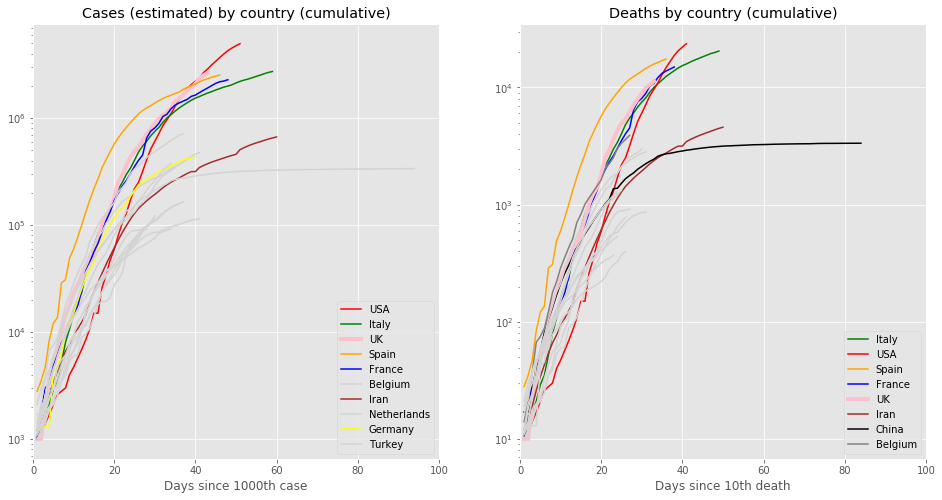

In [71]:
# PLOT CASES_EST_NEW & DEATHS

fig_cN_d = plt.figure(figsize=(16,8))

ax_cN = fig_cN_d.add_subplot(121)
ax_d = fig_cN_d.add_subplot(122)

#plt.style.use('ggplot')

ax_cN.plot(COVID_CASES_EST_NEW_20['United_States_of_America'], label='USA', color='red')
ax_cN.plot(COVID_CASES_EST_NEW_20['Italy'], label='Italy', color='green')
ax_cN.plot(COVID_CASES_EST_NEW_20['United_Kingdom'], label='UK', color='pink',linewidth=4)
ax_cN.plot(COVID_CASES_EST_NEW_20['Spain'], label='Spain', color='orange')
ax_cN.plot(COVID_CASES_EST_NEW_20['France'], label='France', color='blue')
ax_cN.plot(COVID_CASES_EST_NEW_20['Belgium'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Iran'], label='Iran', color='brown')
ax_cN.plot(COVID_CASES_EST_NEW_20['Netherlands'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Germany'], label='Germany', color='yellow')
ax_cN.plot(COVID_CASES_EST_NEW_20['Turkey'], color='lightgray')

ax_d.plot(COVID_DEATHS_20['Italy'], label='Italy', color='green')
ax_d.plot(COVID_DEATHS_20['United_States_of_America'], label='USA', color='red')
ax_d.plot(COVID_DEATHS_20['Spain'], label='Spain', color='orange')
ax_d.plot(COVID_DEATHS_20['France'], label='France', color='blue')
ax_d.plot(COVID_DEATHS_20['United_Kingdom'], label='UK', color='pink',linewidth=4)
ax_d.plot(COVID_DEATHS_20['Iran'], label='Iran', color='brown')
ax_d.plot(COVID_DEATHS_20['China'], label='China',color='black')
ax_d.plot(COVID_DEATHS_20['Belgium'], label='Belgium',color='gray')

ax_cN.set(title='Cases (estimated) by country (cumulative)', xlabel='Days since 1000th case')
ax_d.set(title='Deaths by country (cumulative)', xlabel='Days since 10th death')

ax_cN.legend(loc='lower right')
ax_d.legend(loc='lower right')

ax_cN.plot(COVID_CASES_EST_NEW_20['Brazil'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['China'], label='China', color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Sweden'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Canada'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Switzerland'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['India'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Peru'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Portugal'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Mexico'], color='lightgray')
#ax_cN.plot(COVID_CASES_EST_NEW_20['Ecuador'], color='lightgray')


ax_d.plot(COVID_DEATHS_20['Germany'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Netherlands'],color='lightgray')
ax_d.plot(COVID_DEATHS_20['Brazil'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Turkey'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Sweden'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Switzerland'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Canada'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Portugal'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Austria'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Indonesia'], color='lightgray')
#ax_d.plot(COVID_DEATHS_20['Ecuador'], color='lightgray')
ax_d.plot(COVID_DEATHS_20['Ireland'], color='lightgray')

ax_cN.set(xlim=(0,100))
ax_d.set(xlim=(0,100))

ax_cN.set_yscale('log')
ax_d.set_yscale('log')

plt.show()

In [72]:
# REPORTED CASES VS ESTIMATED CASES

In [73]:
COVID_pivot_cases_cumsum_COLS_ = COVID_pivot_cases_cumsum.loc[:,COVID_cases_cumsum_est_NEW.columns]
COVID_Cases_Reported = COVID_pivot_cases_cumsum_COLS_.iloc[-1,:]
COVID_Cases_Reported.head()

country_c_est
Afghanistan     665.0
Albania         467.0
Algeria        1983.0
Andorra         646.0
Argentina      2272.0
Name: 2020-04-14 00:00:00, dtype: float64

In [74]:
COVID_Cases_Estimated = COVID_cases_cumsum_est_NEW.iloc[-1,:]
COVID_Cases_Estimated.head()

country_c_est
Afghanistan     5942.553191
Albania         3533.223684
Algeria        62949.188641
Andorra         4267.425968
Argentina      17601.264822
Name: 2020-04-14 00:00:00, dtype: float64

In [75]:
POPULATION = COVID.groupby('country')['pop_2018'].mean()
POP = POPULATION.loc[COVID_cases_cumsum_est_NEW.columns]
POP.head()

country_c_est
Afghanistan    37172386.0
Albania         2866376.0
Algeria        42228429.0
Andorra           77006.0
Argentina      44494502.0
Name: pop_2018, dtype: float64

In [76]:
Cases_Pop = pd.DataFrame({'Cases_Reported':COVID_Cases_Reported,'Cases_Estimated':COVID_Cases_Estimated,'Population':POP})
Cases_Pop['Cases_Rep_Pop_%'] = (Cases_Pop['Cases_Reported'] / Cases_Pop['Population'])*100
Cases_Pop['Cases_Est_Pop_%'] = (Cases_Pop['Cases_Estimated'] / Cases_Pop['Population'])*100
Cases_Pop_Sorted = Cases_Pop.sort_values(by='Cases_Estimated', ascending=False)
Cases_Pop_Sorted.head()

,Cases_Reported,Cases_Estimated,Population,Cases_Rep_Pop_%,Cases_Est_Pop_%
country_c_est,,,,,
United_States_of_America,582594.0,4.956655e+06,327167434.0,0.178072,1.515021
Italy,159516.0,2.724340e+06,60431283.0,0.263963,4.508162
United_Kingdom,88621.0,2.630443e+06,66488991.0,0.133287,3.956208
Spain,169496.0,2.518321e+06,46723749.0,0.362762,5.389809
France,98076.0,2.281550e+06,66987244.0,0.146410,3.405947


In [77]:
Cases_Pop_Sorted_displ = Cases_Pop_Sorted.copy()
Cases_Pop_Sorted_displ['Cases_Estimated (m)'] = Cases_Pop_Sorted_displ['Cases_Estimated'] / 1000000
Cases_Pop_Sorted_displ.sort_values(by='Cases_Estimated (m)', ascending=False).head()

,Cases_Reported,Cases_Estimated,Population,Cases_Rep_Pop_%,Cases_Est_Pop_%,Cases_Estimated (m)
country_c_est,,,,,,
United_States_of_America,582594.0,4.956655e+06,327167434.0,0.178072,1.515021,4.956655
Italy,159516.0,2.724340e+06,60431283.0,0.263963,4.508162,2.724340
United_Kingdom,88621.0,2.630443e+06,66488991.0,0.133287,3.956208,2.630443
Spain,169496.0,2.518321e+06,46723749.0,0.362762,5.389809,2.518321
France,98076.0,2.281550e+06,66987244.0,0.146410,3.405947,2.281550


In [78]:
Cases_Pop_Sorted_display = Cases_Pop_Sorted_displ.iloc[:,[5,4]]
Cases_Pop_Sorted_display.head(15)

,Cases_Estimated (m),Cases_Est_Pop_%
country_c_est,,
United_States_of_America,4.956655,1.515021
Italy,2.724340,4.508162
United_Kingdom,2.630443,3.956208
Spain,2.518321,5.389809
France,2.281550,3.405947
Belgium,0.711919,6.232841
Iran,0.665955,0.814123
Netherlands,0.476712,2.766594
Germany,0.432997,0.522136


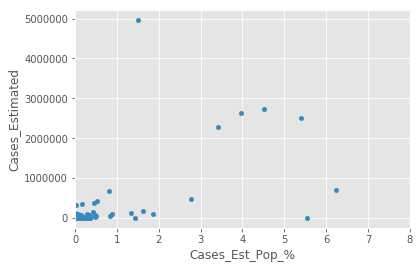

In [79]:
Cases_Pop_Sorted_for_plot = Cases_Pop_Sorted.iloc[:20,[4,1]]

Cases_Pop_Sorted.plot(kind='scatter',x='Cases_Est_Pop_%',y='Cases_Estimated', xlim=(0,8))
plt.show()

In [80]:
# ESTIMATED CASES CUMSUM AS % OF POPULATION

COVID_cases_cumsum_est_NEW_pctofpop = (COVID_cases_cumsum_est_NEW / POP)*100
COVID_cases_cumsum_est_NEW_pctofpop_top20 = COVID_cases_cumsum_est_NEW_pctofpop.loc[:,cases_est_NEW_top20.index]
COVID_cases_cumsum_est_NEW_pctofpop_top20.head()

country_c_est,United_States_of_America,Italy,United_Kingdom,Spain,France,Belgium,Iran,Netherlands,Germany,Turkey,Brazil,China,Sweden,Canada,India,Switzerland,Mexico,Portugal,Indonesia,Peru
Date,,,,,,,,,,,,,,,,,,,,
2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
COVID_cases_cumsum_est_NEW_pctofpop_top20.index

DatetimeIndex(['2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
      

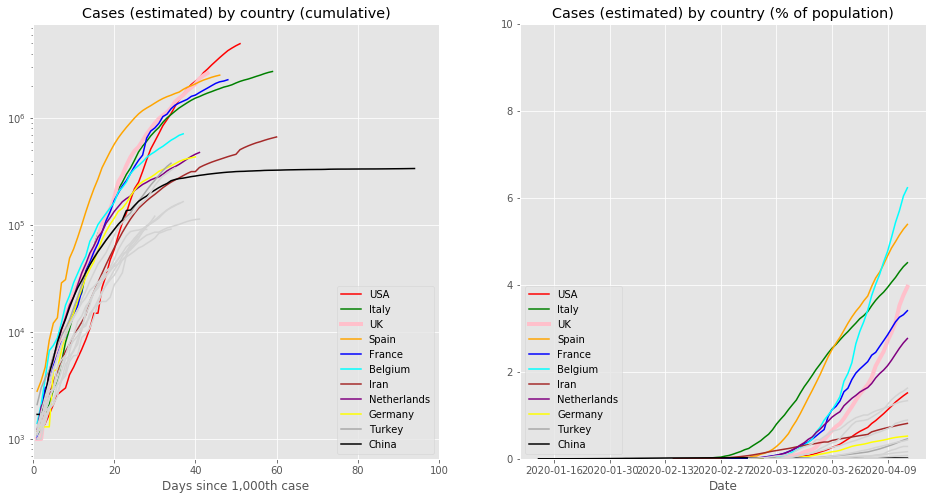

In [84]:
# PLOT CASES_EST_NEW & DEATHS

fig_cNpctpop_d = plt.figure(figsize=(16,8))

ax_cN = fig_cNpctpop_d.add_subplot(121)
ax_cNpctpop = fig_cNpctpop_d.add_subplot(122)

#plt.style.use('ggplot')

ax_cN.plot(COVID_CASES_EST_NEW_20['United_States_of_America'], label='USA', color='red')
ax_cN.plot(COVID_CASES_EST_NEW_20['Italy'], label='Italy', color='green')
ax_cN.plot(COVID_CASES_EST_NEW_20['United_Kingdom'], label='UK', color='pink',linewidth=4)
ax_cN.plot(COVID_CASES_EST_NEW_20['Spain'], label='Spain', color='orange')
ax_cN.plot(COVID_CASES_EST_NEW_20['France'], label='France', color='blue')
ax_cN.plot(COVID_CASES_EST_NEW_20['Belgium'], color='cyan')
ax_cN.plot(COVID_CASES_EST_NEW_20['Iran'], label='Iran', color='brown')
ax_cN.plot(COVID_CASES_EST_NEW_20['Netherlands'], color='purple')
ax_cN.plot(COVID_CASES_EST_NEW_20['Germany'], label='Germany', color='yellow')
ax_cN.plot(COVID_CASES_EST_NEW_20['Turkey'], color='darkgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['China'], label='China', color='black')

ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['United_States_of_America'], label='USA', color='red')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Italy'], label='Italy', color='green')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['United_Kingdom'], label='UK', color='pink',linewidth=4)
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Spain'], label='Spain', color='orange')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['France'], label='France', color='blue')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Belgium'], color='cyan')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Iran'], label='Iran', color='brown')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Netherlands'], color='purple')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Germany'], label='Germany', color='yellow')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Turkey'], color='darkgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['China'], label='China', color='black')

ax_cN.set(title='Cases (estimated) by country (cumulative)')
ax_cN.set(xlabel='Days since 1,000th case')
ax_cNpctpop.set(title='Cases (estimated) by country (% of population)') 
ax_cNpctpop.set(xlabel='Date')

ax_cN.legend(loc='lower right')
ax_cNpctpop.legend(loc='lower left')

ax_cN.plot(COVID_CASES_EST_NEW_20['Brazil'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Sweden'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Canada'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Switzerland'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['India'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Peru'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Portugal'], color='lightgray')
ax_cN.plot(COVID_CASES_EST_NEW_20['Mexico'], color='lightgray')
#ax_cN.plot(COVID_CASES_EST_NEW_20['Ecuador'], color='lightgray')

ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Brazil'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Sweden'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Canada'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Switzerland'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['India'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Peru'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Portugal'], color='lightgray')
ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Mexico'], color='lightgray')
#ax_cNpctpop.plot(COVID_cases_cumsum_est_NEW_pctofpop_top20['Ecuador'], color='lightgray')

ax_cN.set(xlim=(0,100))
ax_cNpctpop.set(ylim=(0,10))

ax_cN.set_yscale('log')
#ax_cNpctpop.set_yscale('log')

plt.show()

In [85]:
1/25

0.04

In [86]:
# ---- WORKINGS ----

In [87]:
dfe = pd.DataFrame({'Date':['2020-01-01','2020-01-02','2020-01-03','2020-01-04','2020-01-05','2020-01-06','2020-01-07','2020-01-08','2020-01-09','2020-01-10','2020-01-11'],'A':[np.nan,23,24,25,26,27,28,29,30,31,32],'B':[np.nan,1,2,3,4,5,6,7,8,9,10]})
dfe

,Date,A,B
0,2020-01-01,NaN,NaN
1,2020-01-02,23.0,1.0
2,2020-01-03,24.0,2.0
3,2020-01-04,25.0,3.0
4,2020-01-05,26.0,4.0
5,2020-01-06,27.0,5.0
6,2020-01-07,28.0,6.0
7,2020-01-08,29.0,7.0
8,2020-01-09,30.0,8.0
9,2020-01-10,31.0,9.0


In [88]:
dfe['A'] = dfe['A']-10
dfe

,Date,A,B
0,2020-01-01,NaN,NaN
1,2020-01-02,13.0,1.0
2,2020-01-03,14.0,2.0
3,2020-01-04,15.0,3.0
4,2020-01-05,16.0,4.0
5,2020-01-06,17.0,5.0
6,2020-01-07,18.0,6.0
7,2020-01-08,19.0,7.0
8,2020-01-09,20.0,8.0
9,2020-01-10,21.0,9.0


In [89]:
dfe.set_index('Date', inplace=True)
dfe

,A,B
Date,,
2020-01-01,NaN,NaN
2020-01-02,13.0,1.0
2020-01-03,14.0,2.0
2020-01-04,15.0,3.0
2020-01-05,16.0,4.0
2020-01-06,17.0,5.0
2020-01-07,18.0,6.0
2020-01-08,19.0,7.0
2020-01-09,20.0,8.0


In [90]:
dfe.index

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       '2020-01-11'],
      dtype='object', name='Date')